Ejemplo: Aprendizaje Automático (Machine Learning) - Agrupamiento con K-Medias ⭐

Pasos en metodología CRISP-DM:

* Comprensión del negocio
* Comprensión de los datos
* Preparación de los datos
* Modelado
* Evaluación
* Distribución

Referencias:

https://www.kaggle.com/code/shrutimechlearn/step-by-step-kmeans-explained-in-detail/notebook

In [2]:
%pip install session-info
%pip install yellowbrick

  Using cached session_info-1.0.0-py3-none-any.whl
  Using cached stdlib_list-0.9.0-py3-none-any.whl (75 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 2.6 MB/s eta 0:00:0000:010:010m

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from itertools import combinations
import sklearn
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from statsmodels.graphics.gofplots import qqplot
import pickle
import warnings 
import session_info

# Configurar parámetros para gráficas
plt.rcParams.update(plt.rcParamsDefault) # restore parameters
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 
sns.set_style('darkgrid')
%matplotlib inline

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Configurar visualización de dataframes
# pd.reset_option('^display.', silent=True) # reset_option('all')
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 400

np.random.seed(43)

# Imprimir información de la sesión
session_info.show()

Paso 1: Entendimiento del negocio




Objetivo comercial:

- Reducción de costos de publicidad
- Aumento de las tasas de conversión
- Mejora de la retención de clientes
- Objetivo de minería de datos:

Objetivo de minería de datos:

- Encontrar K clústeres/grupos de personas basándose en la similitud de sus características.
- Si no se cuenta con un número K de grupos, definir el mejor número de clústeres/grupos.

Paso 2: Comprensión de los datos


- Fuentes de datos: https://www.kaggle.com/datasets/akram24/mall-customers
- Método para adquirir los datos: Descarga directa
- Problemas encontrados: N/A
- Tipo de datos (existente, adquirido, adicional): Existentes (Web)

In [4]:
# Leer dats
df = pd.read_csv('mall_customers.csv', index_col='CustomerID')
df.shape

(200, 4)

In [5]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
# Columnas
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
# Descripción estadística de los atributos numéricos
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


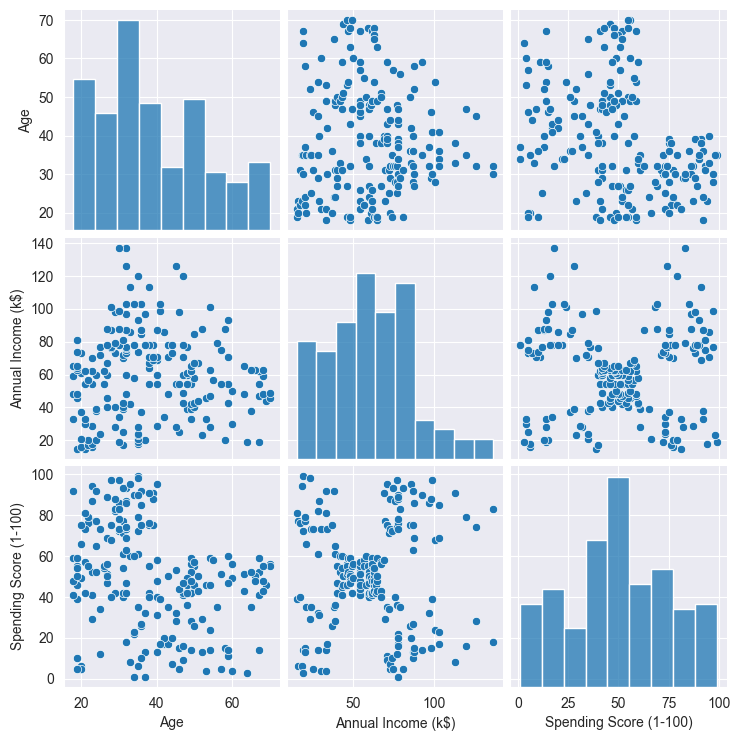

In [8]:
# Graficar distribución de pares de variables
sns.pairplot(df)

Paso 3: Preparación de los datos

In [9]:
# Revisar númer de valores duplicados
df.duplicated().sum()

0

In [10]:
# Revisar valores faltantes
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Para simplificar el ejemplo se continua usando solo las variables Spending Score(1-100) y Annual Income (k$)

In [11]:
df_X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_X.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


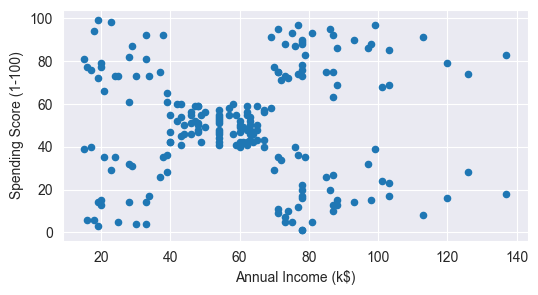

In [12]:
df_X.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', figsize=(6, 3));

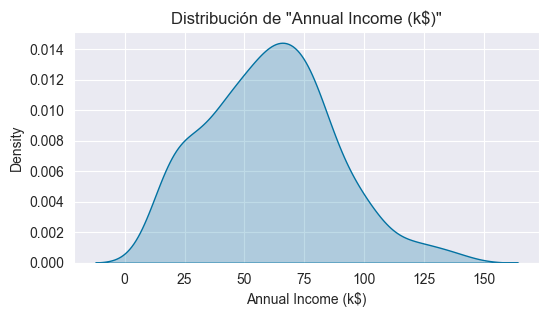

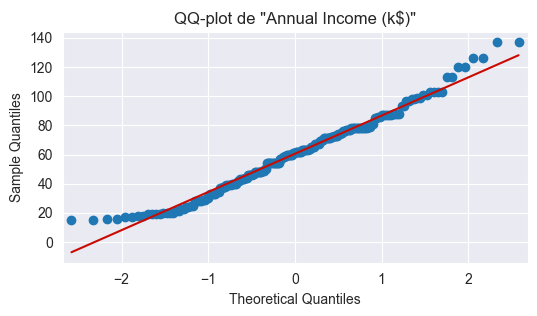

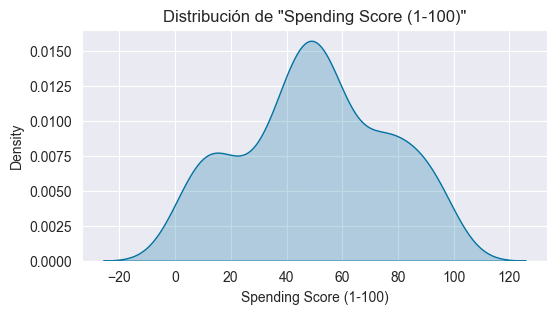

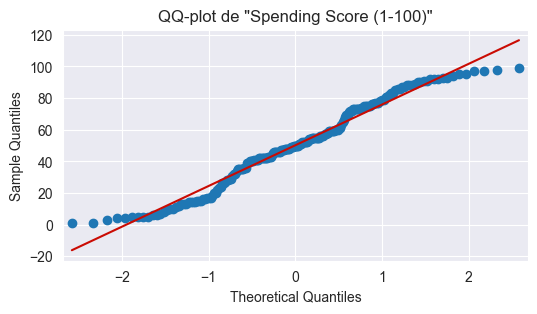

In [13]:
# Distribución de variables numéricas
for var_num in df_X.columns:  # de objetos me da lo mismo que countplot 
    plt.figure(figsize=(6, 3), dpi= 100)
    plt.rc("figure", figsize=(6, 3)) # para qqplot

    sns.kdeplot(df[var_num], shade=True, color="b")

    plt.title(f'Distribución de "{var_num}"')    
    plt.show();

    # Revisar normalidad de variables numéricas
    qqplot(df[var_num], line='s')
    plt.title(f'QQ-plot de "{var_num}"')
    plt.show();

OPTIMIZAR EL NUMERO DE CLUSTERS 

Paso 4: Modelado

In [14]:
# Definir número inicial de clusters
n_clusters = 2

# Definir modelo: KMeans
model_kmeans = KMeans(n_clusters=n_clusters, random_state=43)

# Entrenar modelo
model_kmeans.fit(df_X)

KMeans(n_clusters=2, random_state=43)

In [15]:
# Examinar resultados
y_pred_kmeans = model_kmeans.predict(df_X)
df_kmeans = df_X.copy()
df_kmeans['cluster'] = y_pred_kmeans
df_kmeans.sample(10)

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
57,44,50,0
38,34,73,0
68,48,48,0
80,54,42,0
81,54,51,0
189,103,17,1
184,98,88,1
11,19,14,0
129,71,11,1


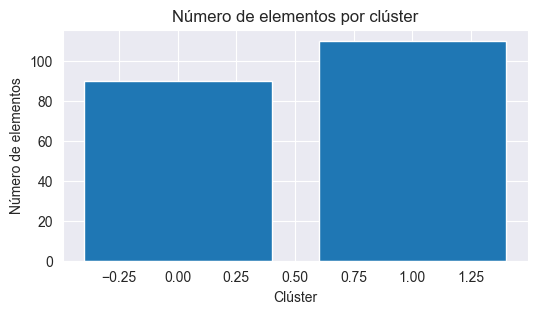

In [16]:
# Graficar elementos por clúster
plt.figure(figsize=(6, 3), dpi= 100)
plt.bar(df_kmeans['cluster'].value_counts().index, df_kmeans['cluster'].value_counts())
plt.title(f'Número de elementos por clúster')
plt.xlabel('Clúster')
plt.ylabel('Número de elementos');
plt.show()

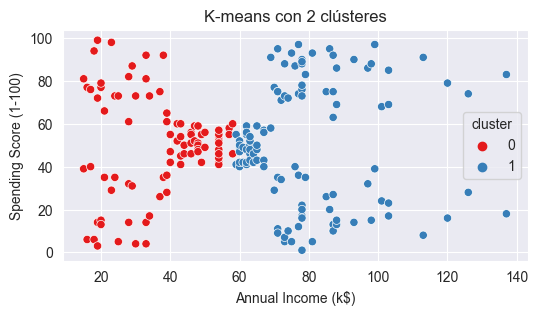

In [17]:
# Graficar resultados
plt.figure(figsize=(6, 3), dpi= 100)
sns.scatterplot(data=df_kmeans, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set1')
plt.title(f'K-means con {n_clusters} clústeres');

Optimizar el número de clústeres

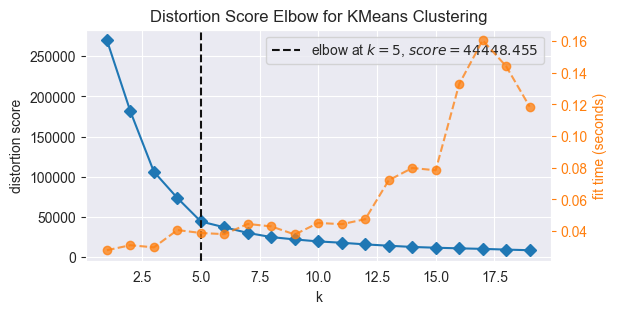

Número óptimo de clústeres: 5


In [18]:
# Usar el método de codo para determinar el número óptimo de clusters
elbow = KElbowVisualizer(model_kmeans, k=(1,20))

elbow.fit(df_X)
elbow.poof();
print(f'Número óptimo de clústeres: {elbow.elbow_value_}')

In [19]:
# Utilizar el número de clústeres óptimo
n_clusters = elbow.elbow_value_ 

model_kmeans = KMeans(n_clusters=n_clusters, random_state=43)
model_kmeans.fit(df_X)

KMeans(n_clusters=5, random_state=43)

Paso 5: Evaluación

In [20]:
# Examinar resultados
y_pred_kmeans = model_kmeans.predict(df_X)
df_kmeans['cluster'] = y_pred_kmeans
df_kmeans.sample(10)

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
155,78,16,2
184,98,88,3
56,43,41,1
64,47,59,1
95,60,42,1
120,67,57,1
21,24,35,4
5,17,40,4
146,77,97,3


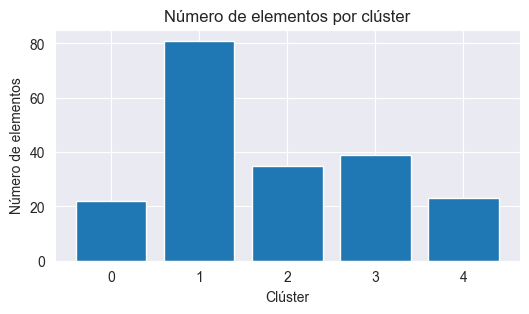

In [21]:
# Graficar elementos por clúster
plt.figure(figsize=(6, 3), dpi= 100)
plt.bar(df_kmeans['cluster'].value_counts().index, df_kmeans['cluster'].value_counts())
plt.title(f'Número de elementos por clúster')
plt.xlabel('Clúster')
plt.ylabel('Número de elementos');
plt.show()

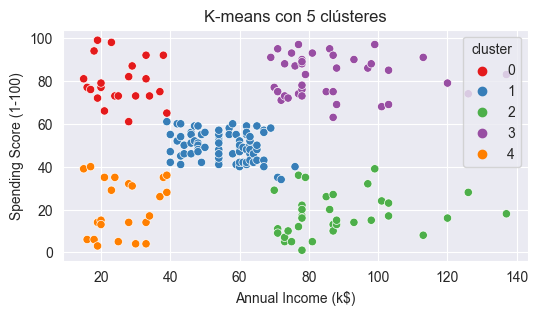

In [22]:
# Graficar resultados
plt.figure(figsize=(6, 3), dpi= 100)
sns.scatterplot(data=df_kmeans, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='cluster', 
                palette='Set1')
plt.title(f'K-means con {n_clusters} clústeres');
plt.show()

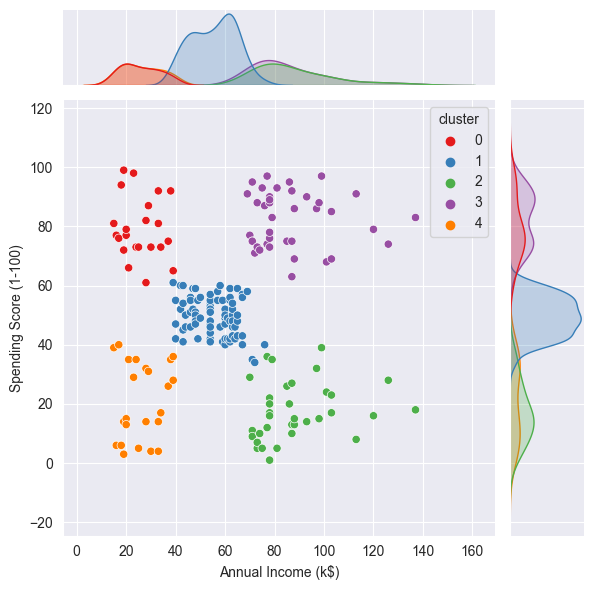

In [23]:
# Graficar resultados y distribución de variables
sns.jointplot(data=df_kmeans, 
              x='Annual Income (k$)', 
              y='Spending Score (1-100)', 
              hue='cluster', 
              palette='Set1')
plt.show()

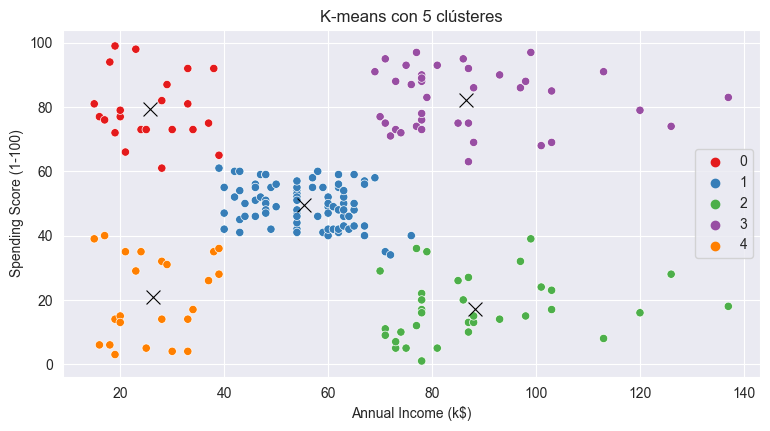

In [24]:
# Graficar resultados con centroides
plt.figure(figsize=(9, 4.5), dpi= 100)
sns.scatterplot(data=df_kmeans, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set1')
sns.scatterplot(data=model_kmeans.cluster_centers_, 
                x=model_kmeans.cluster_centers_[:, 0], 
                y=model_kmeans.cluster_centers_[:, 1], 
                color='black', 
                s=100, 
                marker='x')
plt.title(f'K-means con {n_clusters} clústeres');
plt.show()


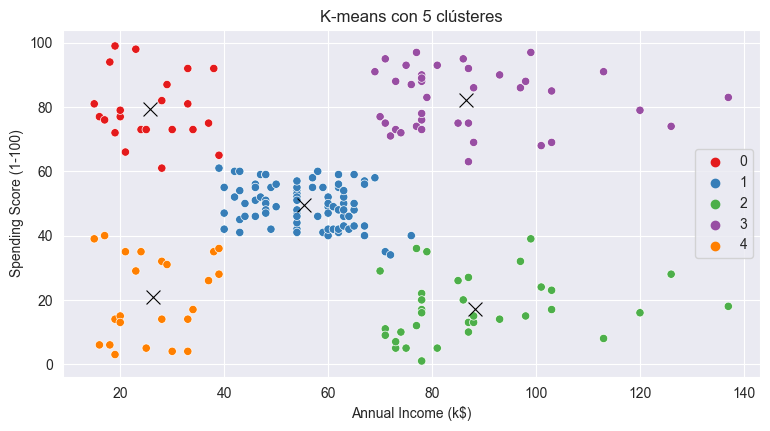

In [25]:
# Graficar resultados con centroides
plt.figure(figsize=(9, 4.5), dpi= 100)
sns.scatterplot(data=df_kmeans, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set1')
sns.scatterplot(data=model_kmeans.cluster_centers_, 
                x=model_kmeans.cluster_centers_[:, 0], 
                y=model_kmeans.cluster_centers_[:, 1], 
                color='black', 
                s=100, 
                marker='x')
plt.title(f'K-means con {n_clusters} clústeres');
plt.show()


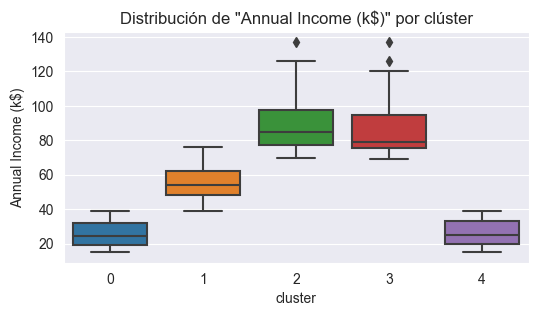

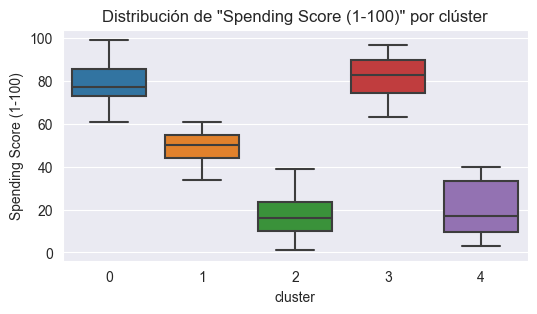

In [26]:
# Graficar distribución de variables por clúster
for var_num in df_X.columns:
    plt.figure(figsize=(6, 3), dpi= 100)
    sns.boxplot(data=df_kmeans, x='cluster', y=var_num)
    plt.title(f'Distribución de "{var_num}" por clúster')
    plt.show();

In [27]:
# Describir un solo clúster (0)
mask = df_kmeans['cluster'] == 0
print(df_kmeans[mask].describe().round(2).T.to_string())

                        count   mean    std   min    25%   50%    75%   max
Annual Income (k$)       22.0  25.73   7.57  15.0  19.25  24.5  32.25  39.0
Spending Score (1-100)   22.0  79.36  10.50  61.0  73.00  77.0  85.75  99.0
cluster                  22.0   0.00   0.00   0.0   0.00   0.0   0.00   0.0


In [29]:
# Guardar descripción de clústeres
df_kmeans.groupby('cluster').describe().round(2).to_pickle('df_kmeans_description.pickle')

In [31]:
# Guardar modelo 
model = model_kmeans
model_type = 'clustering'
library_version = 'kmeans_sklearn' + '_' + sklearn.__version__.replace('.','_')
model_name = model_type + '_' + library_version + '.pickle'

pickle.dump(model, open(model_name, 'wb'))

print(type(model))
print('Saved model: ' + model_name)

<class 'sklearn.cluster._kmeans.KMeans'>
Saved model: clustering_kmeans_sklearn_1_3_0.pickle


Paso 6: Distribución

In [32]:
print(model_name)

clustering_kmeans_sklearn_1_3_0.pickle


In [33]:
# Leer modelo
clust_model = pickle.load(open(model_name, 'rb'))
df_clust_desc = pd.read_pickle('df_kmeans_description.pickle')

In [34]:
df_clust_desc

Annual Income (k$)                                                 \
                     count   mean    std   min    25%   50%    75%    max   
cluster                                                                     
0                     22.0  25.73   7.57  15.0  19.25  24.5  32.25   39.0   
1                     81.0  55.30   8.99  39.0  48.00  54.0  62.00   76.0   
2                     35.0  88.20  16.40  70.0  77.50  85.0  97.50  137.0   
3                     39.0  86.54  16.31  69.0  75.50  79.0  95.00  137.0   
4                     23.0  26.30   7.89  15.0  19.50  25.0  33.00   39.0   

        Spending Score (1-100)                                               
                         count   mean    std   min   25%   50%    75%   max  
cluster                                                                      
0                         22.0  79.36  10.50  61.0  73.0  77.0  85.75  99.0  
1                         81.0  49.52   6.53  34.0  44.0  50.0  55.00  61.0  
2                         35.0  17.11   9.95   1.0  10.0  16.0  23.50  39.0  
3                         39.0  82.13   9.36  63.0  74.5  83.0  90.00  97.0  
4                         23.0  20.91  13.02   3.0   9.5  17.0  33.50  40.0

In [35]:
# Nuevos datos de ['Annual Income (k$)', 'Spending Score (1-100)']
X_new = np.array([[78, 16]])

In [36]:
# Estimación de clúster
y_new = clust_model.predict(X_new)
print(y_new)

[2]


In [37]:
# Descripción del clúster
mask = df_clust_desc.index==y_new[0]
print(df_clust_desc[mask].T.to_string())

cluster                            2
Annual Income (k$)     count   35.00
                       mean    88.20
                       std     16.40
                       min     70.00
                       25%     77.50
                       50%     85.00
                       75%     97.50
                       max    137.00
Spending Score (1-100) count   35.00
                       mean    17.11
                       std      9.95
                       min      1.00
                       25%     10.00
                       50%     16.00
                       75%     23.50
                       max     39.00
